**Brian Blaylock**  
**February 6, 2019**

# Read HRRR-GLM Lightning Hit Rates

- **How do distributions different for other regions? (western USA?)**
- Is Reflectivity a better predictor (probably not, since lightning is generally the area of strongest reflectivity. The only thing this would do is expand the radius of convective areas.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os


import os
SAVEDIR = '/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/HRRR_GOES/GLM_hit_rate/'
if not os.path.exists(SAVEDIR):
    os.makedirs(SAVEDIR)

In [2]:
months = ['May', 'Jun', 'Jul', 'Aug', 'Sep']

In [51]:
hour = 3

data_dict = {}
for m in months:
    DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/'
    FILE = 'GLM_in_HRRR_%s-2018_h%02d.csv' % (m, hour)
    if os.path.exists(DIR+FILE):
        data_dict[m] = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None)        

print(data_dict.keys())

dict_keys(['May', 'Jun', 'Jul', 'Aug', 'Sep'])


/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


In [52]:
data_dict['May'].dtype.names

('DATE',
 'GLM_FLASH_COUNT',
 'FILES',
 'EXPECTED',
 'F00',
 'F01',
 'F02',
 'F03',
 'F04',
 'F05',
 'F06',
 'F07',
 'F08',
 'F09',
 'F10',
 'F11',
 'F12',
 'F13',
 'F14',
 'F15',
 'F16',
 'F17',
 'F18')

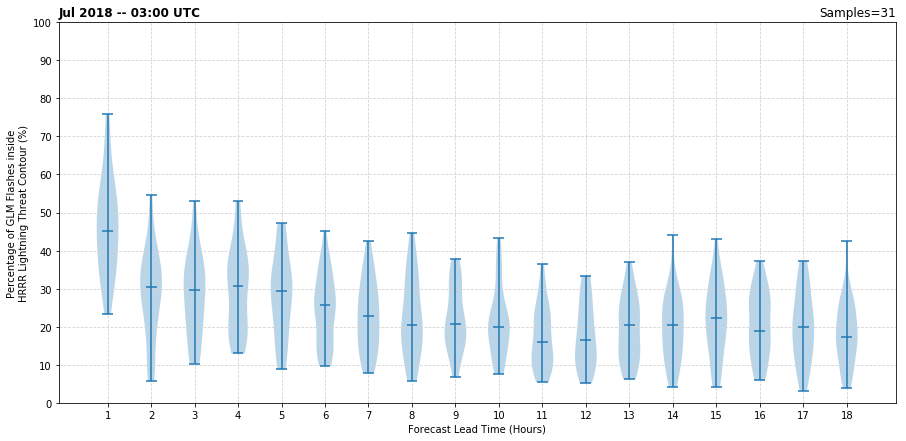

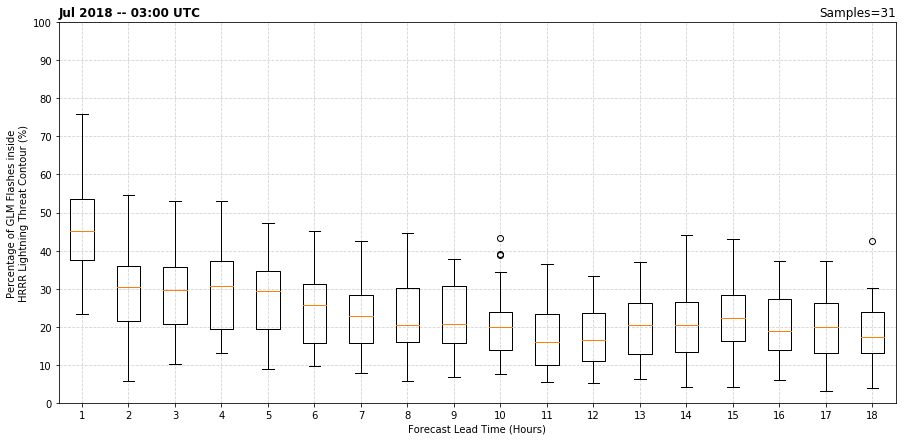

In [53]:
MONTH = 'Jul'

boxes = [data_dict[MONTH]['F%02d'%f]*100 for f in range(1,19)]
boxes = [i[~np.isnan(i)] for i in boxes] # filter out nan values
data = np.array(boxes)


plt.figure(1, figsize=(15,7))
plt.violinplot(boxes, showmedians=True, showmeans=False);
#for i in range(len(a['DATE'])):
#    plt.plot(range(1,19), data[:,i])
plt.title('%s 2018 -- %02d:00 UTC' % (MONTH, hour), loc='left', fontweight='semibold')
plt.title('Samples=%s' % len(data_dict[MONTH]['DATE']), loc='right')
plt.xlabel('Forecast Lead Time (Hours)')
plt.ylabel('Percentage of GLM Flashes inside\nHRRR Lightning Threat Contour (%)')
plt.ylim([0,100])
plt.yticks(range(0,101,10))
plt.xticks(range(1,19))
plt.grid(linestyle='--', color='lightgrey')

plt.savefig(SAVEDIR + "HRRR_GLM_%s_%s" % (MONTH, hour))

plt.figure(2, figsize=(15,7))
plt.boxplot(boxes);
#for i in range(len(a['DATE'])):
#    plt.plot(range(1,19), data[:,i])
plt.title('%s 2018 -- %02d:00 UTC' % (MONTH, hour), loc='left', fontweight='semibold')
plt.title('Samples=%s' % len(data_dict[MONTH]['DATE']), loc='right')
plt.xlabel('Forecast Lead Time (Hours)')
plt.ylabel('Percentage of GLM Flashes inside\nHRRR Lightning Threat Contour (%)')
plt.ylim([0,100])
plt.yticks(range(0,101,10))
plt.xticks(range(1,19))
plt.grid(linestyle='--', color='lightgrey')

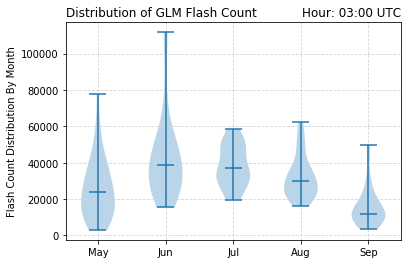

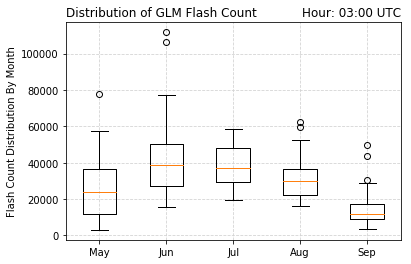

In [54]:
counts = [data_dict[MONTH]['GLM_FLASH_COUNT'] for MONTH in data_dict.keys()]


plt.figure(1)
plt.title("Distribution of GLM Flash Count", loc='left')
plt.title('Hour: %02d:00 UTC' % hour, loc='right')
plt.ylabel('Flash Count Distribution By Month')
plt.violinplot(counts, showmedians=True);
plt.xticks(range(1,1+len(data_dict.keys())), data_dict.keys());
plt.grid(linestyle='--', color='lightgrey')

plt.figure(2)
plt.title("Distribution of GLM Flash Count", loc='left')
plt.title('Hour: %02d:00 UTC' % hour, loc='right')
plt.ylabel('Flash Count Distribution By Month')
plt.boxplot(counts);
plt.xticks(range(1,1+len(data_dict.keys())), data_dict.keys());
plt.grid(linestyle='--', color='lightgrey')

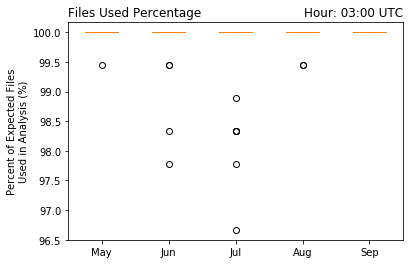

In [55]:
files_present = np.array([data_dict[MONTH]['FILES'] for MONTH in data_dict.keys()])
files_expected = np.array([data_dict[MONTH]['EXPECTED'] for MONTH in data_dict.keys()])

files_percentage = [p/files_expected[i]*100 for i,p in enumerate(files_present)]

plt.figure(2)
plt.title("Files Used Percentage", loc='left')
plt.title('Hour: %02d:00 UTC' % hour, loc='right')
plt.ylabel('Percent of Expected Files\nUsed in Analysis (%)')
plt.boxplot(files_percentage);
plt.xticks(range(1,1+len(data_dict.keys())), data_dict.keys());

In [8]:
files_present

array([array([  0, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180,
       180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180,
       180, 180, 180, 180,   0]),
       array([180, 180, 180, 180, 180, 180, 179, 180, 180, 180, 180, 180,   0,
       180, 180, 180,   0, 180, 180, 180, 180, 180, 180, 180, 164, 180,
       180, 180, 175, 176]),
       array([175, 175, 177, 175, 177, 180, 180, 180, 180, 180, 180, 178, 180,
       180, 180, 180, 180, 179, 180, 180, 180, 180, 180, 179, 179, 180,
         0, 179, 180, 180, 180]),
       array([180, 180, 180, 180, 164, 180, 120, 180, 180, 180, 180, 180, 180,
       180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 175,
       180, 180, 180, 180, 180]),
       array([180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180,
       180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180,
       180, 180, 180, 180])], dtype=object)

In [9]:
f1 = np.sort(os.listdir('/uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20181001/00/'))
f2 = np.sort(os.listdir('/uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20181003/00/'))

In [10]:
f1[0]

'OR_GLM-L2-LCFA_G16_s20182740000000_e20182740000200_c20182740000223.nc'

In [11]:
f1_dates = [datetime.strptime(i.split('_')[3], 's%Y%j%H%M%S%f') for i in f1]
f2_dates = [datetime.strptime(i.split('_')[3], 's%Y%j%H%M%S%f') for i in f2]

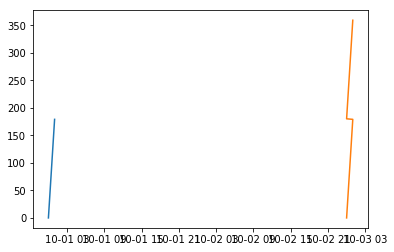

In [12]:
plt.plot(f1_dates,range(180))
plt.plot(f2_dates,range(360))

In [13]:
no_g17 = list(filter(lambda x: '_G16_' in x, f2))

In [14]:
DIR = '/uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20181003/00/'
G16 = DIR+'OR_GLM-L2-LCFA_G16_s20182760059400_e20182760100000_c20182760100027.nc'
G17 = DIR+'OR_GLM-L2-LCFA_G17_s20182760000000_e20182760000200_c20182760000224.nc'

In [15]:
os.path.exists(G17)

True

In [16]:
import xarray
xG16 = xarray.open_dataset(G16)
xG17 = xarray.open_dataset(G17)

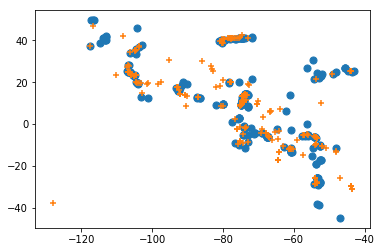

In [17]:
plt.scatter(xG16.flash_lon, xG16.flash_lat, s=50)
plt.scatter(xG17.flash_lon, xG17.flash_lat, s=30, marker='+')

In [18]:
xG17.lon_field_of_view

<xarray.DataArray 'lon_field_of_view' ()>
array(-89.5, dtype=float32)
Coordinates:
    product_time          datetime64[ns] ...
    lightning_wavelength  float32 ...
    group_time_threshold  float32 ...
    flash_time_threshold  float32 ...
    lat_field_of_view     float32 ...
    lon_field_of_view     float32 -89.5
Attributes:
    long_name:      longitude coordinate for center of field of view
    standard_name:  longitude
    units:          degrees_east
    axis:           X
    bounds:         lon_field_of_view_bounds

In [19]:
import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_GOES.get_GLM import get_GLM_file_nearesttime

In [20]:
len(get_GLM_file_nearesttime(datetime(2018,10,3,0,30), window=30)['Files'])

Looking in these file paths for the nearest datetime
   /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20181002/23/
   /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20181003/00/
   /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20181003/01/
---------------------------------------------------
    Date Requested: 2018-10-03 00:30:00
  Nearest GLM file: 2018-10-03 00:30:00
---------------------------------------------------
 Window == +/- 30 Minutes
 Window DATES ==  2018-10-03 00:00:00 2018-10-03 01:00:00
    first observation: 2018-10-03 00:00:00
     last observation: 2018-10-03 01:00:00
  Returning data from 180 GLM files (expected 180)
---------------------------------------------------


180

In [21]:


DATE = datetime(2018,10,3,0,30)
HG7 = '/uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/'
ls1 = HG7+'%s/' % (DATE-timedelta(hours=1)).strftime('%Y%m%d/%H')
ls2 = HG7+'%s/' % DATE.strftime('%Y%m%d/%H')
ls3 = HG7+'%s/' % (DATE+timedelta(hours=1)).strftime('%Y%m%d/%H')

In [22]:
ls3

'/uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20181003/01/'

In [23]:
if os.path.exists(ls1):
        files1 = list(map(lambda x: HG7+(datetime.strptime(x.split('_')[3], 's%Y%j%H%M%S%f')).strftime('%Y%m%d/%H/')+x, os.listdir(ls1)))
        # Remove GOES-17 files if there are any
        f_flies1 = list(filter(lambda x: '_G16_' in x, files1))

In [24]:
len(files1)

360

In [25]:
f_flies1 = list(filter(lambda x: '_G16_' in x, files1))

In [26]:
len(f_flies1)

180

In [27]:
f_flies1

['/uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20181002/23/OR_GLM-L2-LCFA_G16_s20182752300000_e20182752300200_c20182752300226.nc',
 '/uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20181002/23/OR_GLM-L2-LCFA_G16_s20182752300400_e20182752301000_c20182752301027.nc',
 '/uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20181002/23/OR_GLM-L2-LCFA_G16_s20182752300200_e20182752300400_c20182752300429.nc',
 '/uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20181002/23/OR_GLM-L2-LCFA_G16_s20182752301000_e20182752301200_c20182752301224.nc',
 '/uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20181002/23/OR_GLM-L2-LCFA_G16_s20182752301200_e20182752301400_c20182752301423.nc',
 '/uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20181002/23/OR_GLM-L2-LCFA_G16_s20182752301400_e20182752302000_c20182752302028.nc',
 '/uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-